In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('data/adult19.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31997 entries, 0 to 31996
Columns: 534 entries, URBRRL to POVRATTC_A
dtypes: float64(369), int64(164), object(1)
memory usage: 130.4+ MB


In [14]:
# those that feel depressed at least on a weekly basis
df_depressed = df[df.DEPFREQ_A <= 2].copy()

In [15]:
df_depressed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 4 to 31990
Columns: 534 entries, URBRRL to POVRATTC_A
dtypes: float64(369), int64(164), object(1)
memory usage: 12.7+ MB


Introduction: Here, you want to talk about the subject matter domain, an overall take on what makes the topic interesting, and your research questions.

Hypotheses: Given your general research questions, which are based on some interesting observation or outside trend, the next step is to formally state which hypotheses you want to test.

Data: Now that you have walked through the relevance of the topic, posed your research questions, and framed testable hypotheses based on those questions, it's time to introduce the dataset. Tell your audience about the data—when and where was it collected? Perhaps include descriptive statistics or measures of distribution.

Methods: Explain the steps needed to test the hypotheses. This includes any data wrangling, tests, and visualizations that you will need to definitively reject or fail to reject your null hypotheses.

Results: Now, you can walk through the results of the methods. State the results of your tests and explain whether these results mean that you reject or fail to reject the null. Also include compelling tables or graphs to illustrate your findings.

Discussion and recommendations: What insights can interested parties get from this research? What would you recommend for further research?

In [16]:
df_depressed.drop(['RECTYPE','SRVY_YR','HHX','WTIA_A','WTFA_A'],axis=1, inplace=True)

Looking at the urban-rural, classification scheme

<AxesSubplot:xlabel='URBRRL', ylabel='count'>

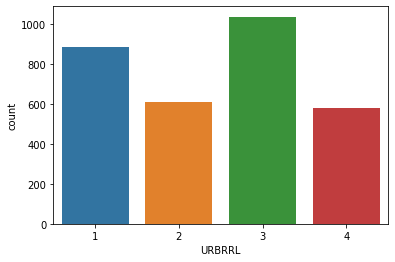

In [18]:
sns.countplot(x=df_depressed.URBRRL)

The first three represent different metropolitan areas whereas 4 represents non-metropolitan.  According to the count plot, the most live in medium and small metro.

Looking at US regions they live in

<AxesSubplot:xlabel='REGION', ylabel='count'>

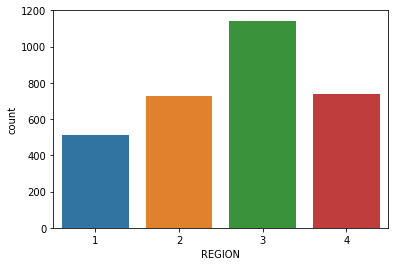

In [19]:
sns.countplot(x=df_depressed.REGION)

The majority live in the south.

In [20]:
df_depressed.drop(['PSTRAT','PPSU'],axis=1,inplace=True)

Looking at the quarter of the year in which the interview took place.  These were roughly similar with percentages although not exactly 25% each for the entire dataset.

<AxesSubplot:xlabel='INTV_QRT', ylabel='count'>

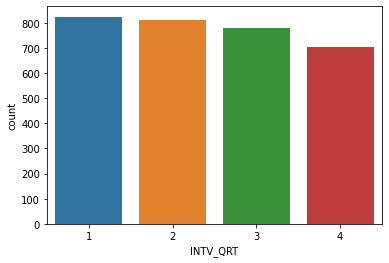

In [21]:
sns.countplot(x=df_depressed.INTV_QRT)

Roughly similar although feweer were depressed during the last quarter.  For further studies, you will want to limit questions to one quarter. Although looking back at the codebook, there were fewer interviews in the last quarter, so quarter doesn't seem to have any effect.  Going to drop it from the dataframe.

In [22]:
df_depressed.drop(['INTV_QRT','HHSTAT_A'],axis=1,inplace=True)

In [24]:
df_depressed.ASTATNEW.value_counts()

1    3059
5      59
Name: ASTATNEW, dtype: int64

As I am only interested in those whom completed the survey, just to make analysis easier, I will filter for astatnew to be 1

In [25]:
df_depressed = df_depressed[df_depressed.ASTATNEW==1].copy()

In [26]:
df_depressed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3059 entries, 4 to 31990
Columns: 525 entries, URBRRL to POVRATTC_A
dtypes: float64(367), int64(158)
memory usage: 12.3 MB


In [27]:
df_depressed.drop('ASTATNEW', axis=1, inplace=True)

In [28]:
df_depressed.AVAIL_A.value_counts()

1    2937
3     122
Name: AVAIL_A, dtype: int64

Not sure yet if I want to include those whom have a condition which does not make it possible to respond and instead a proxy needs to respons

In [30]:
df_depressed.drop('PROXY_A',axis=1,inplace=True)

In [31]:
df_depressed.drop(['PROXYREL_A','HHRESPSA_FLG'],axis=1,inplace=True)

In [33]:
df_depressed.AGEP_A.describe()

count    3059.000000
mean       51.745342
std        18.422736
min        18.000000
25%        36.000000
50%        53.000000
75%        66.000000
max        97.000000
Name: AGEP_A, dtype: float64

In [34]:
df_depressed.drop('AGE65', axis=1, inplace=True)

<AxesSubplot:xlabel='SEX_A', ylabel='count'>

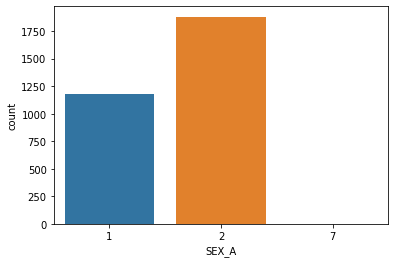

In [35]:
sns.countplot(x=df_depressed.SEX_A)

More femalse than males